### K-Means for Image Segmentation/ Image Compression

**Import required libraries**

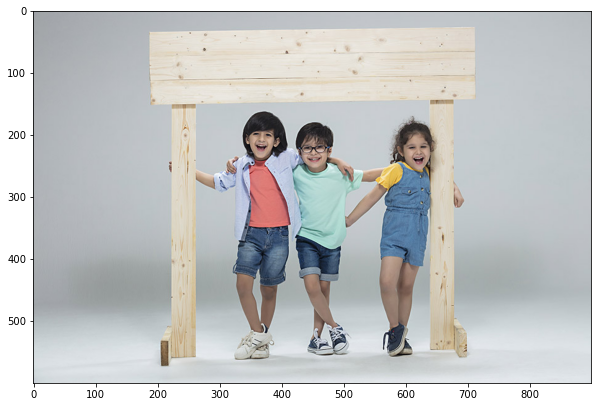

In [6]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

plt.figure(figsize=(10,10))
# Read Images
img = mpimg.imread('kids.jpg')
  
# Output Images
plt.imshow(img)

**Preprocess Image**

In [9]:
data = img.reshape((-1,3))
data = data/255
print(data[:5])

[[0.60392157 0.61568627 0.63529412]
 [0.60784314 0.61960784 0.63921569]
 [0.60784314 0.61960784 0.63921569]
 [0.61176471 0.62352941 0.64313725]
 [0.61176471 0.62352941 0.64313725]]


**K Means Algorithm Implementation**

In [15]:
def segment_image_using_KMeans(no_of_clusters):
    
    K = no_of_clusters
    N = len(data) # no of points in dataset where each point is 3-dimensional (R,G,B)

    # intitialize randomly  K centroids μ1(0),..., μK(0)  as K distinct points of dataset 
    μ = data[tuple([np.random.choice(range(len(data)), size=K, replace=False)])]  # μ = [μ1,μ2,...,μK]
    μ = [ [μ[j]] for j in range(K)]  # list to store all previous updates μ1(t),..,μK(t) till given iteration

    Z = [ np.random.choice(range(1,K+1)) for i in range(N)]

    # E-Step : 

    # Assign each point to 1 of K clusters based on euclidean distance from 
    # centroid's and assign every point to closest of these K clusters 

    t = 0 
    epsilon =  10**(-2)
    print("Beginning K-Means algorithm for K=%d"%K)
    while True : 
        
        #E-Step begins 
        for i in range(N) :
            point = data[i]
            distances  = [ np.linalg.norm(μ[j][t] - point) for j in range(K) ] 
            Z[i] = np.argmin(distances) + 1 
        # End of E-Step

        # M- Step : Update Centroids μ1(t+1), μ2(t+1), ...,  μK(t+1)
        for j in range(1,K+1) : 
            μj_new = np.array([ data[i] for i in range(N) if Z[i]==j ])
            μj_new = np.sum(μj_new, axis=0) / len(μj_new)
            μ[j-1].append(μj_new)
        # End of M-Step

        tmp = np.array([ ( np.linalg.norm(μ[j][t+1] - μ[j][t]) < epsilon) for j in range(K)  ])
        if ( tmp.all() ) : 
            print("Finishing K-Means Algorithm. Bye!")
            print("Total iterations : %d"%t)
            img_updated = np.array([μ[Z[i]-1][-1] for i in range(N)])
            img_updated = img_updated.reshape(img.shape)
            return img_updated
        t = t + 1
    

In [16]:
plt.figure(figsize=(10,5))
result = segment_image_using_KMeans(2)
plt.imshow(result)

Beginning K-Means algorithm for K=2
Finishing K-Means Algorithm. Bye!
Total iterations : 11


Beginning K-Means algorithm for K=2
Finishing K-Means Algorithm. Bye!
Total iterations : 1
Beginning K-Means algorithm for K=5
Finishing K-Means Algorithm. Bye!
Total iterations : 6
Beginning K-Means algorithm for K=10
Finishing K-Means Algorithm. Bye!
Total iterations : 18


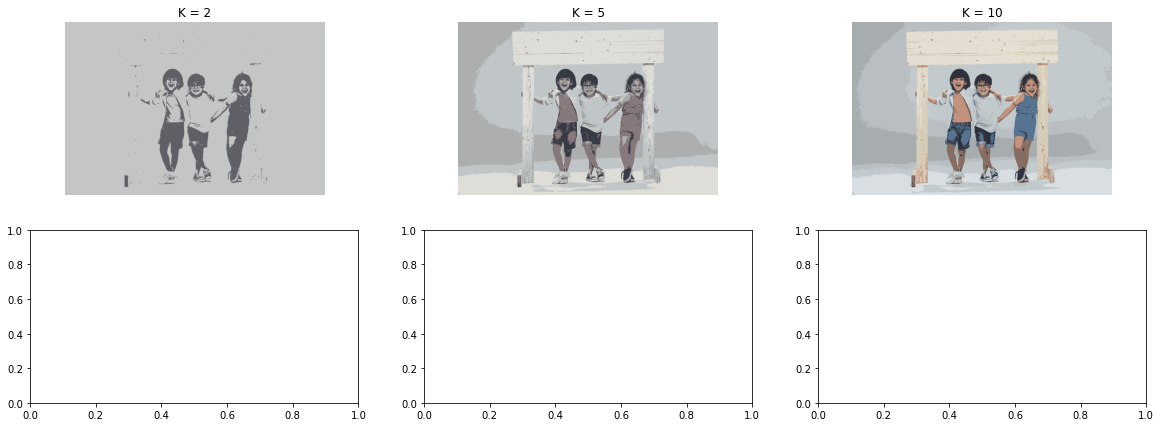

In [33]:
fig,axes = plt.subplots(2,3,figsize=(20,7))
i,j=0,0
for K in [2,5,10] : 
    result = segment_image_using_KMeans(K)
    axes[i,j].imshow(result)
    axes[i,j].axis('off')
    axes[i,j].set_title('K = %d'%K)
    j += 1
    if j == 3 : 
        j = 0 
        i += 1 
    